In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [ ]:
columns_to_keep = [
    "Crash Date", "Crash Time",
    "Road Description", "System Code", "Road Contour Curves", "Road Contour Grade",
    "Road Condition", "Latitude", "Longitude", "City", "County", "Location 1", "Location 2",
    "Weather Condition", "Weather Condition 2", "Lighting Conditions",
    "TU-1 Speed Limit", "TU-2 Speed Limit",
    "TU-1 Alcohol Suspected", "TU-2 Alcohol Suspected",
    "Injury 00", "Injury 01", "Injury 02", "Injury 03", "Injury 04"
]

In [ ]:
file_1='/content/drive/MyDrive/Dataset/CDOTRM_CD_Crash_Listing_-_2021.xlsx'
file_2='/content/drive/MyDrive/Dataset/CDOTRM_CD_Crash_Listing_-_2022.xlsx'
file_3='/content/drive/MyDrive/Dataset/CDOTRM_CD_Crash_Listing_-_2023.xlsx'
file_4='/content/drive/MyDrive/Dataset/CDOTRM_CD_Crash_Listing_-_2024.xlsx'

In [ ]:
file_paths = [file_1,file_2, file_3,file_4]

In [ ]:
df_list = []
for file in file_paths:
    df_file = pd.read_excel(file, usecols=columns_to_keep)
    df_list.append(df_file)


In [ ]:
df = pd.concat(df_list, ignore_index=True)

In [ ]:
df.to_excel("/content/drive/MyDrive/Dataset/merged_data.xlsx", index=False)

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Dataset/merged_data.xlsx")

In [ ]:
df.head()

System Code Crash Date Crash Time              City     County  Latitude  Longitude  \
0  State Highway 2021-01-01   00:00:00  GLENWOOD SPRINGS   GARFIELD  39.52549 -107.32253   
1    County Road 2021-01-01   00:05:00               NaN   LA PLATA       NaN        NaN   
2    City Street 2021-01-01   00:17:00       WESTMINSTER  JEFFERSON  39.82885 -105.04402   
3    City Street 2021-01-01   00:25:00            DENVER     DENVER  39.70461 -105.01356   
4    County Road 2021-01-01   00:26:00               NaN  JEFFERSON       NaN        NaN   

           Location 1 Location 2      Road Description  Injury 00  Injury 01  Injury 02  \
0      SOUTH GLEN AVE    27TH ST  Intersection Related          5          0          0   
1              CR 228       MM 4      Non-Intersection          1          0          0   
2        TENNYSON ST   74TH AVE       Non-Intersection          0          0          0   
3  2200 BLK W GILL PL  S ZUNI ST      Non-Intersection          0          0          0   
4          W 32ND AVE  W 37TH DR  Intersection Related          0          0          0   

   Injury 03  Injury 04 Road Contour Curves Road Contour Grade Road Condition Lighting Conditions  \
0          0          0            Straight              Level          Snowy            Daylight   
1          0          0                 NaN                NaN            Icy    Dark – Unlighted   
2          0          0                 NaN                NaN            Dry    Dark – Unlighted   
3          0          0                 NaN                NaN            Dry    Dark – Unlighted   
4          0          0                 NaN                NaN            Dry    Dark – Unlighted   

  Weather Condition Weather Condition 2  TU-1 Speed Limit  TU-2 Speed Limit  \
0              Snow                 NaN                35                 0   
1             Clear                 NaN                35                 0   
2             Clear                 NaN                25                25   
3             Clear                 NaN                30                30   
4             Clear                 NaN                35                 0   

  TU-1 Alcohol Suspected TU-2 Alcohol Suspected  
0                    NaN          No - Observed  
1                    NaN                    NaN  
2                    NaN                    NaN  
3                    NaN                    NaN  
4                    NaN                    NaN

In [ ]:
df.shape

(388255, 25)

In [ ]:
df.columns


Index(['System Code', 'Crash Date', 'Crash Time', 'City', 'County', 'Latitude', 'Longitude',
       'Location 1', 'Location 2', 'Road Description', 'Injury 00', 'Injury 01', 'Injury 02',
       'Injury 03', 'Injury 04', 'Road Contour Curves', 'Road Contour Grade', 'Road Condition',
       'Lighting Conditions', 'Weather Condition', 'Weather Condition 2', 'TU-1 Speed Limit',
       'TU-2 Speed Limit', 'TU-1 Alcohol Suspected', 'TU-2 Alcohol Suspected'],
      dtype='object')

In [ ]:
df["Crash Date"] = pd.to_datetime(df["Crash Date"], format="%Y-%m-%d")
df["Day of Week"] = df["Crash Date"].dt.day_name()
df["Crash Hour"] = pd.to_datetime(df["Crash Time"], format="%H:%M:%S").dt.hour

df["Is Weekday"] = df["Day of Week"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]).astype(int)


In [ ]:
weekday_crashes = df[df["Is Weekday"] == 1].groupby("Crash Hour").size()
weekend_crashes = df[df["Is Weekday"] == 0].groupby("Crash Hour").size()


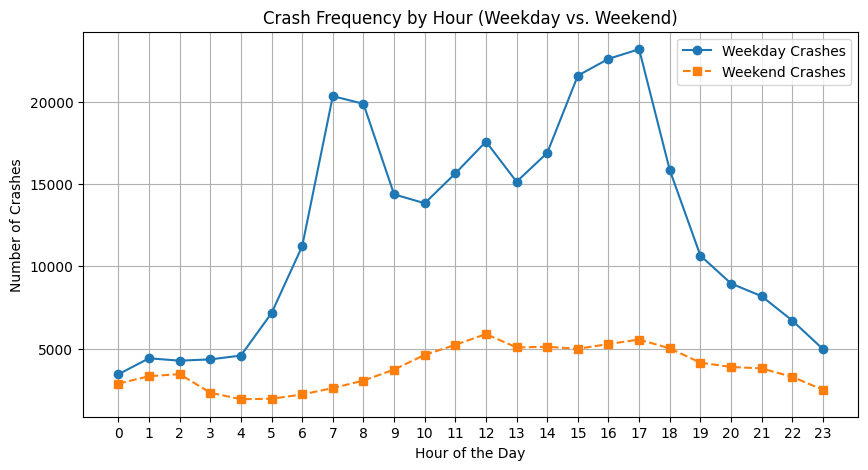

In [ ]:
plt.figure(figsize=(10, 5))

# Weekday crashes
plt.plot(weekday_crashes.index, weekday_crashes.values, marker="o", linestyle="-", label="Weekday Crashes")

# Weekend crashes
plt.plot(weekend_crashes.index, weekend_crashes.values, marker="s", linestyle="--", label="Weekend Crashes")

# Labels and Title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crashes")
plt.title("Crash Frequency by Hour (Weekday vs. Weekend)")
plt.xticks(range(0, 24))  # Set x-axis to show all 24 hours
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<b>Observations from the graph:</b>
1. Acccidents causes more in weekdays than weekends.
2. Rush Hours in weekdays- 7:00 AM- 10:00 AM, 3:00PM - 6:00PM
3. Rush Hours in weekends - 9:00AM-12:00AM, 4:00PM - 7:00PM

In [ ]:
def is_rush_hour(row):
    if row["Is Weekday"] == 1:  # Only check rush hours on weekdays
        if (7 <= row["Crash Hour"] <= 10) or (15 <= row["Crash Hour"] <= 19):
            return 1  # Rush hour
    return 0  # Non-rush hour


In [ ]:
df["Rush Hour"] = df.apply(is_rush_hour, axis=1)

In [ ]:
df.head()

System Code Crash Date Crash Time              City     County  Latitude  Longitude  \
0  State Highway 2021-01-01   00:00:00  GLENWOOD SPRINGS   GARFIELD  39.52549 -107.32253   
1    County Road 2021-01-01   00:05:00               NaN   LA PLATA       NaN        NaN   
2    City Street 2021-01-01   00:17:00       WESTMINSTER  JEFFERSON  39.82885 -105.04402   
3    City Street 2021-01-01   00:25:00            DENVER     DENVER  39.70461 -105.01356   
4    County Road 2021-01-01   00:26:00               NaN  JEFFERSON       NaN        NaN   

           Location 1 Location 2      Road Description  Injury 00  Injury 01  Injury 02  \
0      SOUTH GLEN AVE    27TH ST  Intersection Related          5          0          0   
1              CR 228       MM 4      Non-Intersection          1          0          0   
2        TENNYSON ST   74TH AVE       Non-Intersection          0          0          0   
3  2200 BLK W GILL PL  S ZUNI ST      Non-Intersection          0          0          0   
4          W 32ND AVE  W 37TH DR  Intersection Related          0          0          0   

   Injury 03  Injury 04 Road Contour Curves Road Contour Grade Road Condition Lighting Conditions  \
0          0          0            Straight              Level          Snowy            Daylight   
1          0          0                 NaN                NaN            Icy    Dark – Unlighted   
2          0          0                 NaN                NaN            Dry    Dark – Unlighted   
3          0          0                 NaN                NaN            Dry    Dark – Unlighted   
4          0          0                 NaN                NaN            Dry    Dark – Unlighted   

  Weather Condition Weather Condition 2  TU-1 Speed Limit  TU-2 Speed Limit  \
0              Snow                 NaN                35                 0   
1             Clear                 NaN                35                 0   
2             Clear                 NaN                25                25   
3             Clear                 NaN                30                30   
4             Clear                 NaN                35                 0   

  TU-1 Alcohol Suspected TU-2 Alcohol Suspected Day of Week  Crash Hour  Is Weekday  Rush Hour  
0                    NaN          No - Observed      Friday         0.0           1          0  
1                    NaN                    NaN      Friday         0.0           1          0  
2                    NaN                    NaN      Friday         0.0           1          0  
3                    NaN                    NaN      Friday         0.0           1          0  
4                    NaN                    NaN      Friday         0.0           1          0

In [ ]:
df = df.drop(["Day of Week", "Is Weekday", "Crash Hour"], axis=1)

In [ ]:
df.head()

System Code Crash Date Crash Time              City     County  Latitude  Longitude  \
0  State Highway 2021-01-01   00:00:00  GLENWOOD SPRINGS   GARFIELD  39.52549 -107.32253   
1    County Road 2021-01-01   00:05:00               NaN   LA PLATA       NaN        NaN   
2    City Street 2021-01-01   00:17:00       WESTMINSTER  JEFFERSON  39.82885 -105.04402   
3    City Street 2021-01-01   00:25:00            DENVER     DENVER  39.70461 -105.01356   
4    County Road 2021-01-01   00:26:00               NaN  JEFFERSON       NaN        NaN   

           Location 1 Location 2      Road Description  Injury 00  Injury 01  Injury 02  \
0      SOUTH GLEN AVE    27TH ST  Intersection Related          5          0          0   
1              CR 228       MM 4      Non-Intersection          1          0          0   
2        TENNYSON ST   74TH AVE       Non-Intersection          0          0          0   
3  2200 BLK W GILL PL  S ZUNI ST      Non-Intersection          0          0          0   
4          W 32ND AVE  W 37TH DR  Intersection Related          0          0          0   

   Injury 03  Injury 04 Road Contour Curves Road Contour Grade Road Condition Lighting Conditions  \
0          0          0            Straight              Level          Snowy            Daylight   
1          0          0                 NaN                NaN            Icy    Dark – Unlighted   
2          0          0                 NaN                NaN            Dry    Dark – Unlighted   
3          0          0                 NaN                NaN            Dry    Dark – Unlighted   
4          0          0                 NaN                NaN            Dry    Dark – Unlighted   

  Weather Condition Weather Condition 2  TU-1 Speed Limit  TU-2 Speed Limit  \
0              Snow                 NaN                35                 0   
1             Clear                 NaN                35                 0   
2             Clear                 NaN                25                25   
3             Clear                 NaN                30                30   
4             Clear                 NaN                35                 0   

  TU-1 Alcohol Suspected TU-2 Alcohol Suspected  Rush Hour  
0                    NaN          No - Observed          0  
1                    NaN                    NaN          0  
2                    NaN                    NaN          0  
3                    NaN                    NaN          0  
4                    NaN                    NaN          0

In [ ]:
df['TU-1 Alcohol Suspected'].value_counts()

TU-1 Alcohol Suspected
No - Observed                    252262
Yes - Observed                     9845
No - Other Method                  9159
Yes - SFST                         7479
No - SFST                          3076
Yes - Preliminary Breath Test      3033
Yes - Other Method                 2714
Unknown                            1760
No - Preliminary Breath Test        960
Name: count, dtype: int64

In [ ]:
df['TU-2 Alcohol Suspected'].value_counts()

TU-2 Alcohol Suspected
No - Observed                    222507
No - Other Method                  4886
No - SFST                          1543
No - Preliminary Breath Test        595
Yes - Observed                      382
Yes - Preliminary Breath Test       319
Yes - SFST                          230
Unknown                             114
Yes - Other Method                   95
Name: count, dtype: int64

In [ ]:
def combine_alcohol_suspected(row):
    yes_values = ["Yes - Preliminary Breath Test", "Yes - Observed", "Yes - SFST", "Yes - Other Method"]
    # Set to "Yes" if either TU-1 or TU-2 indicates alcohol suspicion
    if (row["TU-1 Alcohol Suspected"] in yes_values) or (row["TU-2 Alcohol Suspected"] in yes_values):
        return "Yes"
    return "No"

In [ ]:
df["Alcohol Suspected"] = df.apply(combine_alcohol_suspected, axis=1)

In [ ]:
df = df.drop(["TU-1 Alcohol Suspected", "TU-2 Alcohol Suspected"], axis=1)

In [ ]:
df.head()

System Code Crash Date Crash Time              City     County  Latitude  Longitude  \
0  State Highway 2021-01-01   00:00:00  GLENWOOD SPRINGS   GARFIELD  39.52549 -107.32253   
1    County Road 2021-01-01   00:05:00               NaN   LA PLATA       NaN        NaN   
2    City Street 2021-01-01   00:17:00       WESTMINSTER  JEFFERSON  39.82885 -105.04402   
3    City Street 2021-01-01   00:25:00            DENVER     DENVER  39.70461 -105.01356   
4    County Road 2021-01-01   00:26:00               NaN  JEFFERSON       NaN        NaN   

           Location 1 Location 2      Road Description  Injury 00  Injury 01  Injury 02  \
0      SOUTH GLEN AVE    27TH ST  Intersection Related          5          0          0   
1              CR 228       MM 4      Non-Intersection          1          0          0   
2        TENNYSON ST   74TH AVE       Non-Intersection          0          0          0   
3  2200 BLK W GILL PL  S ZUNI ST      Non-Intersection          0          0          0   
4          W 32ND AVE  W 37TH DR  Intersection Related          0          0          0   

   Injury 03  Injury 04 Road Contour Curves Road Contour Grade Road Condition Lighting Conditions  \
0          0          0            Straight              Level          Snowy            Daylight   
1          0          0                 NaN                NaN            Icy    Dark – Unlighted   
2          0          0                 NaN                NaN            Dry    Dark – Unlighted   
3          0          0                 NaN                NaN            Dry    Dark – Unlighted   
4          0          0                 NaN                NaN            Dry    Dark – Unlighted   

  Weather Condition Weather Condition 2  TU-1 Speed Limit  TU-2 Speed Limit  Rush Hour  \
0              Snow                 NaN                35                 0          0   
1             Clear                 NaN                35                 0          0   
2             Clear                 NaN                25                25          0   
3             Clear                 NaN                30                30          0   
4             Clear                 NaN                35                 0          0   

  Alcohol Suspected  
0                No  
1                No  
2                No  
3                No  
4                No

In [ ]:
def combine_speed_limit(row):
    # Get the speed limits and ignore zeros
    speed1 = row["TU-1 Speed Limit"]
    speed2 = row["TU-2 Speed Limit"]

    # Find the maximum of the two, but ignore 0 values
    if speed1 > 0 and speed2 > 0:
        return max(speed1, speed2)
    elif speed1 > 0:
        return speed1
    elif speed2 > 0:
        return speed2
    else:
        return 0  # Default to 0 if both are missing or invalid


In [ ]:
df["Speed Limit"] = df.apply(combine_speed_limit, axis=1)

In [ ]:
def categorize_speed_limit(speed):
    if speed == 0:
        return "Unknown"
    elif 0 < speed <= 35:  # Low: 0–35 mph (city streets, residential)
        return "Low"
    elif 40 <= speed <= 55:  # Medium: 40–55 mph (urban highways, arterial roads)
        return "Medium"
    else:  # High: 60+ mph (interstates, major highways)
        return "High"

In [ ]:
df["Speed Limit Category"] = df["Speed Limit"].apply(categorize_speed_limit)

In [ ]:
df = df.drop(["TU-1 Speed Limit", "TU-2 Speed Limit", "Speed Limit"], axis=1)

In [ ]:
df.head()

System Code Crash Date Crash Time              City     County  Latitude  Longitude  \
0  State Highway 2021-01-01   00:00:00  GLENWOOD SPRINGS   GARFIELD  39.52549 -107.32253   
1    County Road 2021-01-01   00:05:00               NaN   LA PLATA       NaN        NaN   
2    City Street 2021-01-01   00:17:00       WESTMINSTER  JEFFERSON  39.82885 -105.04402   
3    City Street 2021-01-01   00:25:00            DENVER     DENVER  39.70461 -105.01356   
4    County Road 2021-01-01   00:26:00               NaN  JEFFERSON       NaN        NaN   

           Location 1 Location 2      Road Description  Injury 00  Injury 01  Injury 02  \
0      SOUTH GLEN AVE    27TH ST  Intersection Related          5          0          0   
1              CR 228       MM 4      Non-Intersection          1          0          0   
2        TENNYSON ST   74TH AVE       Non-Intersection          0          0          0   
3  2200 BLK W GILL PL  S ZUNI ST      Non-Intersection          0          0          0   
4          W 32ND AVE  W 37TH DR  Intersection Related          0          0          0   

   Injury 03  Injury 04 Road Contour Curves Road Contour Grade Road Condition Lighting Conditions  \
0          0          0            Straight              Level          Snowy            Daylight   
1          0          0                 NaN                NaN            Icy    Dark – Unlighted   
2          0          0                 NaN                NaN            Dry    Dark – Unlighted   
3          0          0                 NaN                NaN            Dry    Dark – Unlighted   
4          0          0                 NaN                NaN            Dry    Dark – Unlighted   

  Weather Condition Weather Condition 2  Rush Hour Alcohol Suspected Speed Limit Category  
0              Snow                 NaN          0                No                  Low  
1             Clear                 NaN          0                No                  Low  
2             Clear                 NaN          0                No                  Low  
3             Clear                 NaN          0                No                  Low  
4             Clear                 NaN          0                No                  Low

In [ ]:
df['Weather Condition'].value_counts()

Weather Condition
Clear                                318048
Cloudy                                25990
Snow                                  17296
Rain                                  12946
Sleet or Hail                          4044
Wind                                   2804
Blowing Snow                           1816
Fog                                     813
Freezing Rain or Freezing Drizzle       799
Dust                                    101
Name: count, dtype: int64

In [ ]:
df = df.drop("Weather Condition 2", axis=1)

In [ ]:
df.head()

System Code Crash Date Crash Time              City     County  Latitude  Longitude  \
0  State Highway 2021-01-01   00:00:00  GLENWOOD SPRINGS   GARFIELD  39.52549 -107.32253   
1    County Road 2021-01-01   00:05:00               NaN   LA PLATA       NaN        NaN   
2    City Street 2021-01-01   00:17:00       WESTMINSTER  JEFFERSON  39.82885 -105.04402   
3    City Street 2021-01-01   00:25:00            DENVER     DENVER  39.70461 -105.01356   
4    County Road 2021-01-01   00:26:00               NaN  JEFFERSON       NaN        NaN   

           Location 1 Location 2      Road Description  Injury 00  Injury 01  Injury 02  \
0      SOUTH GLEN AVE    27TH ST  Intersection Related          5          0          0   
1              CR 228       MM 4      Non-Intersection          1          0          0   
2        TENNYSON ST   74TH AVE       Non-Intersection          0          0          0   
3  2200 BLK W GILL PL  S ZUNI ST      Non-Intersection          0          0          0   
4          W 32ND AVE  W 37TH DR  Intersection Related          0          0          0   

   Injury 03  Injury 04 Road Contour Curves Road Contour Grade Road Condition Lighting Conditions  \
0          0          0            Straight              Level          Snowy            Daylight   
1          0          0                 NaN                NaN            Icy    Dark – Unlighted   
2          0          0                 NaN                NaN            Dry    Dark – Unlighted   
3          0          0                 NaN                NaN            Dry    Dark – Unlighted   
4          0          0                 NaN                NaN            Dry    Dark – Unlighted   

  Weather Condition  Rush Hour Alcohol Suspected Speed Limit Category  
0              Snow          0                No                  Low  
1             Clear          0                No                  Low  
2             Clear          0                No                  Low  
3             Clear          0                No                  Low  
4             Clear          0                No                  Low

In [ ]:
df = df.drop("Road Contour Grade", axis=1)
df = df.drop("Road Contour Curves", axis=1)


In [ ]:
df.head()

System Code Crash Date Crash Time              City     County  Latitude  Longitude  \
0  State Highway 2021-01-01   00:00:00  GLENWOOD SPRINGS   GARFIELD  39.52549 -107.32253   
1    County Road 2021-01-01   00:05:00               NaN   LA PLATA       NaN        NaN   
2    City Street 2021-01-01   00:17:00       WESTMINSTER  JEFFERSON  39.82885 -105.04402   
3    City Street 2021-01-01   00:25:00            DENVER     DENVER  39.70461 -105.01356   
4    County Road 2021-01-01   00:26:00               NaN  JEFFERSON       NaN        NaN   

           Location 1 Location 2      Road Description  Injury 00  Injury 01  Injury 02  \
0      SOUTH GLEN AVE    27TH ST  Intersection Related          5          0          0   
1              CR 228       MM 4      Non-Intersection          1          0          0   
2        TENNYSON ST   74TH AVE       Non-Intersection          0          0          0   
3  2200 BLK W GILL PL  S ZUNI ST      Non-Intersection          0          0          0   
4          W 32ND AVE  W 37TH DR  Intersection Related          0          0          0   

   Injury 03  Injury 04 Road Condition Lighting Conditions Weather Condition  Rush Hour  \
0          0          0          Snowy            Daylight              Snow          0   
1          0          0            Icy    Dark – Unlighted             Clear          0   
2          0          0            Dry    Dark – Unlighted             Clear          0   
3          0          0            Dry    Dark – Unlighted             Clear          0   
4          0          0            Dry    Dark – Unlighted             Clear          0   

  Alcohol Suspected Speed Limit Category  
0                No                  Low  
1                No                  Low  
2                No                  Low  
3                No                  Low  
4                No                  Low

In [ ]:
def create_severity(row):
    if row["Injury 04"] >= 1:
        return "fatal"
    elif row["Injury 03"] >= 1:
        return "serious"
    else:
        return "slight"

In [ ]:
df["Severity"] = df.apply(create_severity, axis=1)

In [ ]:
df = df.drop(["Injury 00", "Injury 01", "Injury 02", "Injury 03", "Injury 04"], axis=1)

In [ ]:
df.head()

System Code Crash Date Crash Time              City     County  Latitude  Longitude  \
0  State Highway 2021-01-01   00:00:00  GLENWOOD SPRINGS   GARFIELD  39.52549 -107.32253   
1    County Road 2021-01-01   00:05:00               NaN   LA PLATA       NaN        NaN   
2    City Street 2021-01-01   00:17:00       WESTMINSTER  JEFFERSON  39.82885 -105.04402   
3    City Street 2021-01-01   00:25:00            DENVER     DENVER  39.70461 -105.01356   
4    County Road 2021-01-01   00:26:00               NaN  JEFFERSON       NaN        NaN   

           Location 1 Location 2      Road Description Road Condition Lighting Conditions  \
0      SOUTH GLEN AVE    27TH ST  Intersection Related          Snowy            Daylight   
1              CR 228       MM 4      Non-Intersection            Icy    Dark – Unlighted   
2        TENNYSON ST   74TH AVE       Non-Intersection            Dry    Dark – Unlighted   
3  2200 BLK W GILL PL  S ZUNI ST      Non-Intersection            Dry    Dark – Unlighted   
4          W 32ND AVE  W 37TH DR  Intersection Related            Dry    Dark – Unlighted   

  Weather Condition  Rush Hour Alcohol Suspected Speed Limit Category Severity  
0              Snow          0                No                  Low   slight  
1             Clear          0                No                  Low   slight  
2             Clear          0                No                  Low   slight  
3             Clear          0                No                  Low   slight  
4             Clear          0                No                  Low   slight

In [ ]:

output_file_path ="/content/drive/MyDrive/Dataset/data1.xlsx"
df.to_excel(output_file_path, index=False, engine="openpyxl")